1. Importing Necessary Libraries
--------------------------------------


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# For dimensionality reduction
from sklearn.decomposition import PCA

# For statistical operations
from scipy import stats

# Setting the style for plots
sns.set(style="whitegrid")


2. Loading the Dataset
------------------

Load the Pima Indians Diabetes dataset from the specified CSV file path.



In [2]:
# Load the dataset
data = pd.read_csv("/workspaces/Data-analysis-2/Naive_Bayes_Classifier/pima_indians_diabetes.csv")


3. Basic Data Exploratio
-----------------

3.1. Previewing the Data


In [3]:
# Preview the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3.2. Understanding the Data Structure


In [4]:
# Get information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.3. Statistical Summary


In [5]:
# Get statistical summary of the dataset
data_summary = data.describe().T
data_summary.style.background_gradient(cmap="Blues")


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


3.4. Class Distribution


In [6]:
# Count of each class in the target variable
data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

3.5. Mean Values by Outcome


In [7]:
# Mean values of features grouped by the Outcome
data.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


4. Missing Values Analysis
-----------------

4.1. Identifying Invalid Zeros


In [8]:
# List of columns where zero is an invalid value
invalid_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count of zeros in each specified column
for col in invalid_zero_columns:
    zero_count = (data[col] == 0).sum()
    print(f'{col} has {zero_count} zeros')


Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


4.2. Replacing Zeros with NaN
|

In [9]:
# Replace zeros with NaN in the specified columns
data[invalid_zero_columns] = data[invalid_zero_columns].replace(0, np.nan)


4.3. Checking Missing Values After Replacement


In [10]:
# Check for missing values after replacing zeros with NaN
print("Missing Values After Replacement:")
print(data.isnull().sum())


Missing Values After Replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


5. Handling Missing Values and Data Preprocessing


-----------------
5.1. Applying KNN Imputation
We use K-Nearest Neighbors (KNN) imputation to fill in missing values based on the similarity with other data points.




In [11]:
# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform the imputation
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)


5.2. Verify Imputed Values


In [12]:
# Verify that there are no more NaN values
print("Missing Values After KNN Imputation:")
print(data_imputed.isnull().sum())


Missing Values After KNN Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


6. Preparing the Data for Modeling
---------------------------------------

6.1. Option A: Using All Features After Imputation


In [13]:
# Define features and target
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


6.2. Option B: Dropping 'Insulin' and 'SkinThickness'


In [14]:
# Drop columns with too many missing values
data_reduced = data_imputed.drop(['Insulin', 'SkinThickness'], axis=1)

# Define features and target
X_reduced = data_reduced.drop('Outcome', axis=1)
y_reduced = data_reduced['Outcome']

# Standardize the features
X_reduced_scaled = scaler.fit_transform(X_reduced)


7. Splitting the Data
-------------------------
7.1. Option A: All Features


In [15]:
# Split the dataset into training and testing sets for Option A
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


7.2. Option B: Dropping 'Insulin' and 'SkinThickness'


In [16]:
# Split the dataset into training and testing sets for Option B
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced_scaled, y_reduced, test_size=0.2, random_state=42
)


8. Training the Naive Bayes Model
--------------------
8.1. Option A: All Features

|

In [17]:
# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with all features after KNN imputation: {accuracy:.2f}')


Accuracy with all features after KNN imputation: 0.74


8.2. Option B: Dropping 'Insulin' and 'SkinThickness'


In [18]:
# Initialize the Gaussian Naive Bayes model for reduced features
gnb_reduced = GaussianNB()

# Train the model
gnb_reduced.fit(X_train_reduced, y_train_reduced)

# Predict on the test set
y_pred_reduced = gnb_reduced.predict(X_test_reduced)

# Evaluate the model
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f'Accuracy after dropping \'Insulin\' and \'SkinThickness\': {accuracy_reduced:.2f}')


Accuracy after dropping 'Insulin' and 'SkinThickness': 0.75


9. Evaluating the Models
-------------
9.1. Classification Report and ROC AUC for Option A


In [19]:
# Classification report for Option A
print("Classification Report (All Features):")
print(classification_report(y_test, y_pred))

# ROC AUC for Option A
y_prob = gnb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC (All Features): {auc:.2f}')


Classification Report (All Features):
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79        99
         1.0       0.62      0.71      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.74      0.74       154

ROC AUC (All Features): 0.83


9.2. Classification Report and ROC AUC for Option B


In [20]:
# Classification report for Option B
print("Classification Report (Reduced Features):")
print(classification_report(y_test_reduced, y_pred_reduced))

# ROC AUC for Option B
y_prob_reduced = gnb_reduced.predict_proba(X_test_reduced)[:, 1]
auc_reduced = roc_auc_score(y_test_reduced, y_prob_reduced)
print(f'ROC AUC (Reduced Features): {auc_reduced:.2f}')


Classification Report (Reduced Features):
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC AUC (Reduced Features): 0.84


10. Advanced Techniques for Model Improvement
----------------------------------------

10.1. Outlier Detection and Removal
----------------------------




In [21]:
# Combine features and target for outlier detection
data_combined = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data_combined))
threshold = 3  # Z-score threshold

# Filter out outliers
data_no_outliers = data_combined[(z_scores < threshold).all(axis=1)]

# Separate features and target
X_no_outliers = data_no_outliers.drop('Outcome', axis=1)
y_no_outliers = data_no_outliers['Outcome']

# Standardize the features
X_no_outliers_scaled = scaler.fit_transform(X_no_outliers)

# Split the data
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers_scaled, y_no_outliers, test_size=0.2, random_state=42
)

# Train and evaluate the Naive Bayes model without outliers
gnb_no_outliers = GaussianNB()
gnb_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = gnb_no_outliers.predict(X_test_no_outliers)
accuracy_no_outliers = accuracy_score(y_test_no_outliers, y_pred_no_outliers)
print(f'Accuracy after removing outliers: {accuracy_no_outliers:.2f}')


Accuracy after removing outliers: 0.76


10.2. Feature Transformation


In [22]:
# Apply logarithmic transformation to skewed features
skewed_features = ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']

for feature in skewed_features:
    data_imputed[feature] = np.log1p(data_imputed[feature])


10.3. Feature Engineering
|

In [23]:
# Eample: Create an interaction term between BMI and Age
data_imputed['BMI_Age'] = data_imputed['BMI'] * data_imputed['Age']


10.4. Ensemble Methods


Ensemble Model Accuracy: 0.73
Ensemble Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        99
         1.0       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



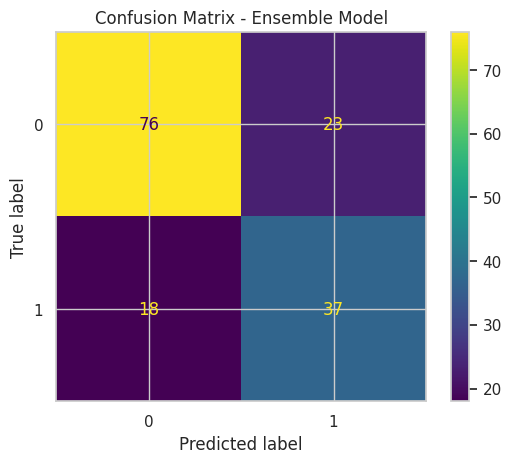

In [24]:
# Define base models
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()

# Create a Voting Classifier ensemble
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft'
)

# Train the ensemble model
eclf.fit(X_train, y_train)

# Predict on the test set
y_pred_ensemble = eclf.predict(X_test)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble:.2f}')

# Classification report for the ensemble model
print("Ensemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion matrix for the ensemble model
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix - Ensemble Model")
plt.show()


11. Visualization
--------------
11.1. Dimensionality Reduction with PCA



In [25]:
# Initialize PCA to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


11.2. Scatter Plots for Actual vs. Predicted Labels
|

In [26]:
# Define a function to plot scatter plots
def plot_scatter(X_pca, y_actual, y_pred, title_actual, title_pred):
    plt.figure(figsize=(12, 5))

    # Actual Labels
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=y_actual,
        cmap='viridis',
        alpha=0.7
    )
    plt.title(title_actual)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(*scatter.legend_elements(), title="Classes")

    # Predicted Labels
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=y_pred,
        cmap='viridis',
        alpha=0.7
    )
    plt.title(title_pred)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(*scatter.legend_elements(), title="Classes")

    plt.tight_layout()
    plt.show()


11.5. Enhanced Visualization with Seaborn


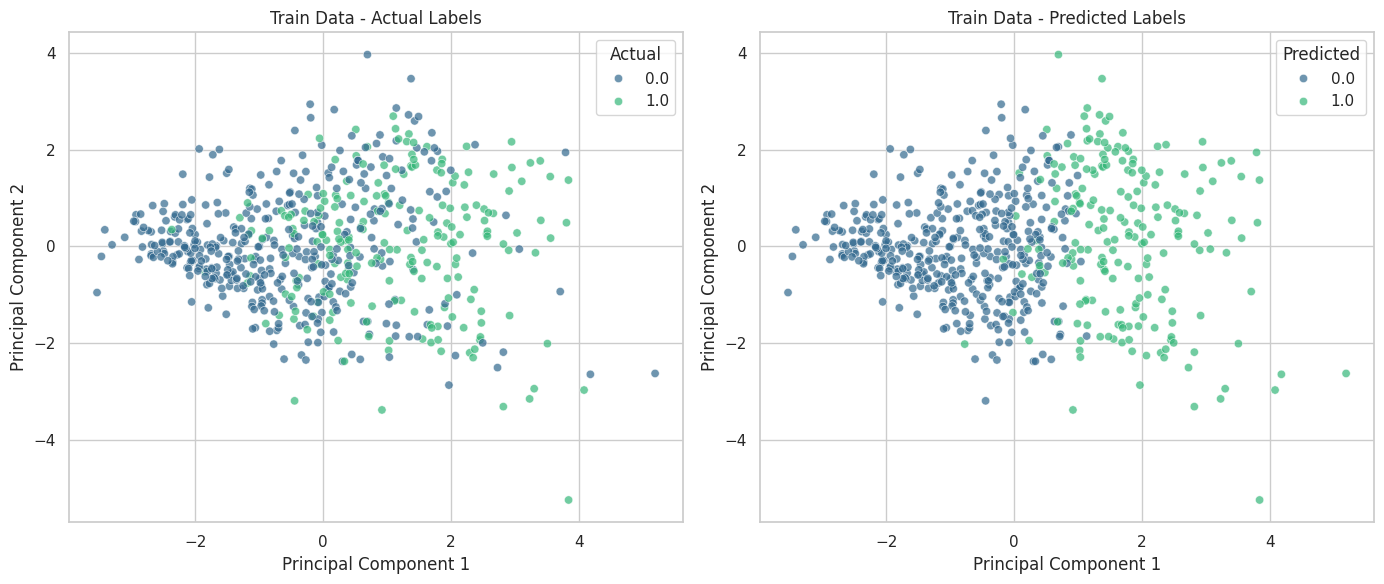

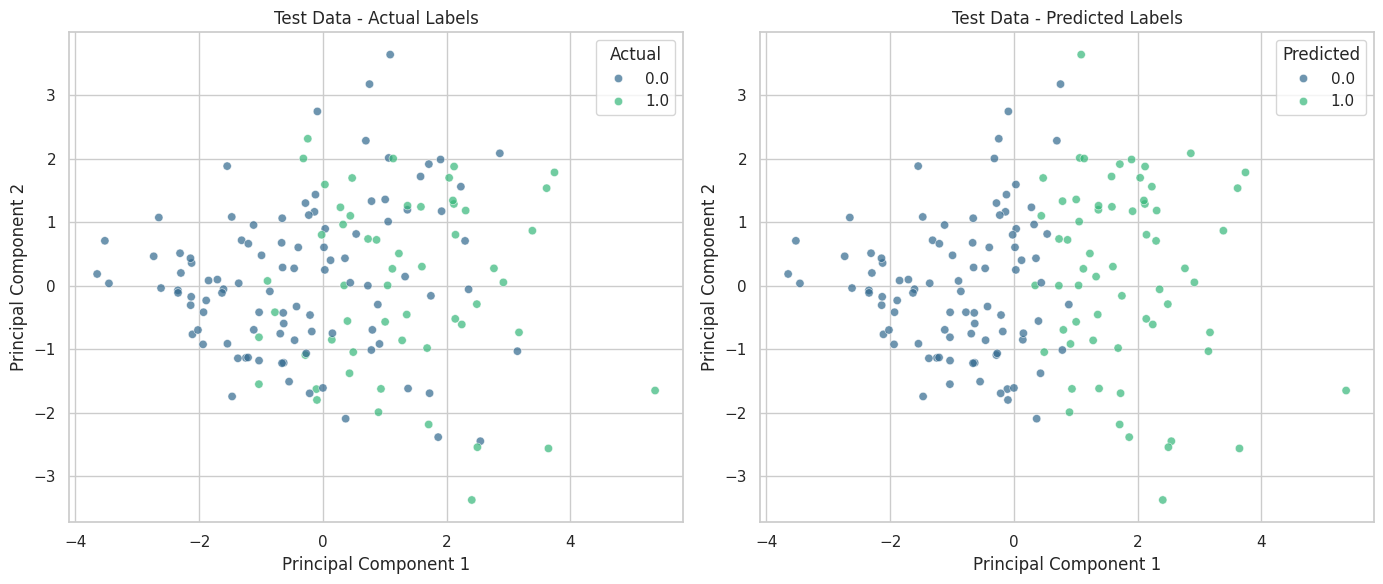

In [29]:
# Create DataFrames for Seaborn plotting
train_df_pca = pd.DataFrame({
    'PC1': X_train_pca[:, 0],
    'PC2': X_train_pca[:, 1],
    'Actual': y_train,
    'Predicted': y_pred_train
})

test_df_pca = pd.DataFrame({
    'PC1': X_test_pca[:, 0],
    'PC2': X_test_pca[:, 1],
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot Training Data - Actual Labels
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=train_df_pca,
    x='PC1',
    y='PC2',
    hue='Actual',
    palette='viridis',
    alpha=0.7
)
plt.title("Train Data - Actual Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot Training Data - Predicted Labels
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=train_df_pca,
    x='PC1',
    y='PC2',
    hue='Predicted',
    palette='viridis',
    alpha=0.7
)
plt.title("Train Data - Predicted Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

# Plot Test Data - Actual Labels
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=test_df_pca,
    x='PC1',
    y='PC2',
    hue='Actual',
    palette='viridis',
    alpha=0.7
)
plt.title("Test Data - Actual Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot Test Data - Predicted Labels
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=test_df_pca,
    x='PC1',
    y='PC2',
    hue='Predicted',
    palette='viridis',
    alpha=0.7
)
plt.title("Test Data - Predicted Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


11.6. ROC Curve


ROC AUC (Test Data): 0.83


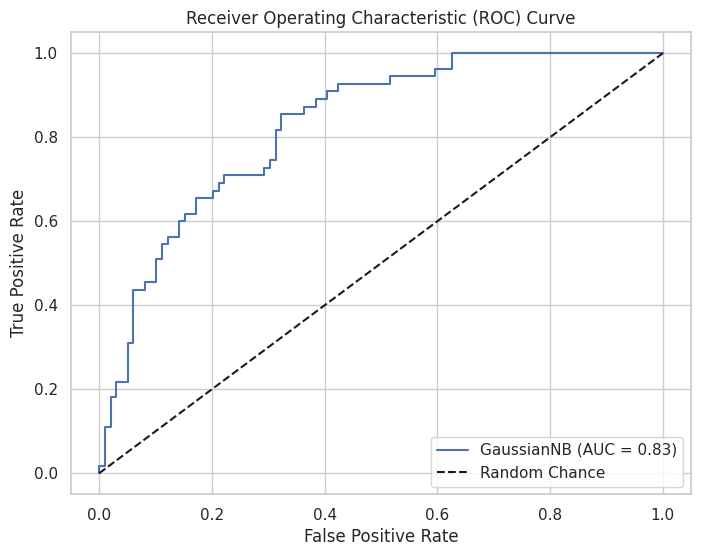

In [30]:
# Calculate ROC AUC
y_prob = gnb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC (Test Data): {auc:.2f}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GaussianNB (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [31]:
# Print all accuracy scores
print(f'Accuracy with all features after KNN imputation: {accuracy:.2f}')
print(f'Accuracy after dropping \'Insulin\' and \'SkinThickness\': {accuracy_reduced:.2f}')
print(f'Accuracy after removing outliers: {accuracy_no_outliers:.2f}')
print(f'Ensemble Model Accuracy: {accuracy_ensemble:.2f}')


Accuracy with all features after KNN imputation: 0.74
Accuracy after dropping 'Insulin' and 'SkinThickness': 0.75
Accuracy after removing outliers: 0.76
Ensemble Model Accuracy: 0.73
